Importing needed libraries

In [ ]:
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.utils import class_weight
from tensorflow.keras.layers import Input
from tensorflow.keras import backend as K


Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installing the dataset from Kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/Kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls -l ~/.kaggle/

total 4
-rw------- 1 root root 68 Mar  3 10:06 kaggle.json


In [ ]:
!kaggle datasets download -d hassan06/nslkdd
!unzip nslkdd.zip -d /content/kdd

Dataset URL: https://www.kaggle.com/datasets/hassan06/nslkdd
License(s): unknown
nslkdd.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  nslkdd.zip
  inflating: /content/kdd/KDDTest+.arff  
  inflating: /content/kdd/KDDTest+.txt  
  inflating: /content/kdd/KDDTest-21.arff  
  inflating: /content/kdd/KDDTest-21.txt  
  inflating: /content/kdd/KDDTest1.jpg  
  inflating: /content/kdd/KDDTrain+.arff  
  inflating: /content/kdd/KDDTrain+.txt  
  inflating: /content/kdd/KDDTrain+_20Percent.arff  
  inflating: /content/kdd/KDDTrain+_20Percent.txt  
  inflating: /content/kdd/KDDTrain1.jpg  
  inflating: /content/kdd/index.html  
  inflating: /content/kdd/nsl-kdd/KDDTest+.arff  
  inflating: /content/kdd/nsl-kdd/KDDTest+.txt  
  inflating: /content/kdd/nsl-kdd/KDDTest-21.arff  
  inflating: /content/kdd/nsl-kdd/KDDTest-21.txt  
  inflating: /content/kdd/nsl-kdd/KDDTest1.jpg  
  inflating: /content/kdd/nsl-kdd/KDDTrain+.arff  
  inflating: /conten

List all files in the directory

In [ ]:
print(os.listdir("/content/kdd"))

In [ ]:
# Load the dataset using tab as a separator
df_train = pd.read_csv("/content/kdd/KDDTrain+.txt", sep="\t", header=None)
df_test = pd.read_csv("/content/kdd/KDDTest+.txt", sep="\t", header=None)

# Display info

In [ ]:
print(df_train.head())
print(df_train.info())

In [ ]:
print(df_train.shape)
print(df_train.columns)
print(df_train.head())

(125973, 1)
Index([0], dtype='int64')
                                                   0
0  0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,...
1  0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0...
2  0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...
3  0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0...
4  0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,...


In [ ]:
df_train = pd.read_csv("/content/kdd/KDDTrain+.txt", sep=",", header=None)
df_test = pd.read_csv("/content/kdd/KDDTest+.txt", sep=",", header=None)

print(df_train.shape)
print(df_train.head())

(125973, 43)
   0    1         2   3    4     5   6   7   8   9   ...    33    34    35  \
0   0  tcp  ftp_data  SF  491     0   0   0   0   0  ...  0.17  0.03  0.17   
1   0  udp     other  SF  146     0   0   0   0   0  ...  0.00  0.60  0.88   
2   0  tcp   private  S0    0     0   0   0   0   0  ...  0.10  0.05  0.00   
3   0  tcp      http  SF  232  8153   0   0   0   0  ...  1.00  0.00  0.03   
4   0  tcp      http  SF  199   420   0   0   0   0  ...  1.00  0.00  0.00   

     36    37    38    39    40       41  42  
0  0.00  0.00  0.00  0.05  0.00   normal  20  
1  0.00  0.00  0.00  0.00  0.00   normal  15  
2  0.00  1.00  1.00  0.00  0.00  neptune  19  
3  0.04  0.03  0.01  0.00  0.01   normal  21  
4  0.00  0.00  0.00  0.00  0.00   normal  21  

[5 rows x 43 columns]


# Clean up and Pre-processing

In [ ]:
df_train = df_train.iloc[:, :-1]
df_test = df_test.iloc[:, :-1]

In [ ]:
print(df_train.shape)  # Should now be (125973, 42)


(125973, 42)


In [ ]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
           "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
           "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
           "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
           "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
           "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
           "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
           "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "Label"
]

df_train.columns = columns
df_test.columns = columns


In [ ]:
print(df_train.head())
print(df_train.info())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


Train test and numerisising

In [ ]:
df_train['Label'] = df_train['Label'].apply(lambda x: 1 if x != 'normal' else 0)
df_test['Label'] = df_test['Label'].apply(lambda x: 1 if x != 'normal' else 0)


In [ ]:
df_train = pd.get_dummies(df_train, columns=['protocol_type', 'service', 'flag'])
df_test = pd.get_dummies(df_test, columns=['protocol_type', 'service', 'flag'])


In [ ]:
scaler = StandardScaler()
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

80/20 Split

In [ ]:
X = df_train.drop(columns=['Label'])
y = df_train['Label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Fixes and more pre-processing

In [ ]:
missing_cols = set(X_train.columns) - set(df_test.columns)

for col in missing_cols:
    df_test[col] = 0

df_test = df_test[X_train.columns]

In [ ]:
print("Train Columns:", df_train.columns)
print("Test Columns:", df_test.columns)

Train Columns: Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=123)
Test Columns: Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=122)


In [ ]:
print("Number of columns in train:", df_train.shape[1])
print("Number of columns in test:", df_test.shape[1])
print("\nFirst few rows of train data:\n", df_train.head())

Number of columns in train: 43
Number of columns in test: 43

First few rows of train data:
    0    1         2   3    4     5   6   7   8   9   ...    33    34    35  \
0   0  tcp  ftp_data  SF  491     0   0   0   0   0  ...  0.17  0.03  0.17   
1   0  udp     other  SF  146     0   0   0   0   0  ...  0.00  0.60  0.88   
2   0  tcp   private  S0    0     0   0   0   0   0  ...  0.10  0.05  0.00   
3   0  tcp      http  SF  232  8153   0   0   0   0  ...  1.00  0.00  0.03   
4   0  tcp      http  SF  199   420   0   0   0   0  ...  1.00  0.00  0.00   

     36    37    38    39    40       41  42  
0  0.00  0.00  0.00  0.05  0.00   normal  20  
1  0.00  0.00  0.00  0.00  0.00   normal  15  
2  0.00  1.00  1.00  0.00  0.00  neptune  19  
3  0.04  0.03  0.01  0.00  0.01   normal  21  
4  0.00  0.00  0.00  0.00  0.00   normal  21  

[5 rows x 43 columns]


In [ ]:
df_train = df_train.iloc[:, :-1]  # Drop last column
df_test = df_test.iloc[:, :-1]

In [ ]:
print("New number of columns in train:", df_train.shape[1])  # Should be 42
print("New number of columns in test:", df_test.shape[1])  # Should be 42

New number of columns in train: 42
New number of columns in test: 42


In [ ]:
df_train.columns = columns
df_test.columns = columns

In [ ]:
print(df_train.head())
print(df_train.info())  # Should show 42 columns with correct data types

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


In [ ]:
df_train['Label'] = df_train['Label'].apply(lambda x: 1 if x != 'normal' else 0)
df_test['Label'] = df_test['Label'].apply(lambda x: 1 if x != 'normal' else 0)

In [ ]:
df_train = pd.get_dummies(df_train, columns=['protocol_type', 'service', 'flag'])
df_test = pd.get_dummies(df_test, columns=['protocol_type', 'service', 'flag'])

Re-Try

In [ ]:
# Get missing columns in test set
missing_cols = set(df_train.columns) - set(df_test.columns)

# Add missing columns to test set with value 0
for col in missing_cols:
    df_test[col] = 0

# Reorder test set columns to match training set
df_test = df_test[df_train.columns]

In [ ]:
# Identify numeric columns (all except Label)
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols.drop('Label')  # Exclude the target column

# Apply StandardScaler
scaler = StandardScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [ ]:
# Define feature set (X) and labels (y)
X_train = df_train.drop(columns=['Label'])
y_train = df_train['Label']
X_test = df_test.drop(columns=['Label'])
y_test = df_test['Label']

Splitting again

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

Final correct shapes

In [ ]:
print("Train Shape:", X_train.shape, "Label Shape:", y_train.shape)
print("Validation Shape:", X_val.shape, "Label Shape:", y_val.shape)
print("Test Shape:", X_test.shape, "Label Shape:", y_test.shape)

print("\nTrain Label Distribution:\n", y_train.value_counts())
print("\nTest Label Distribution:\n", y_test.value_counts())

Train Shape: (100778, 122) Label Shape: (100778,)
Validation Shape: (25195, 122) Label Shape: (25195,)
Test Shape: (22544, 122) Label Shape: (22544,)

Train Label Distribution:
 Label
0    53874
1    46904
Name: count, dtype: int64

Test Label Distribution:
 Label
1    12833
0     9711
Name: count, dtype: int64


# Models

GRU

In [ ]:
# Convert to numpy arrays
X = np.array(X_train)
y = np.array(y_train)
X_test_final = np.array(X_test)
y_test_final = np.array(y_test)

# Reshape for GRU input (Samples, Time Steps=1, Features)
X = X.reshape((X.shape[0], 1, X.shape[1]))
X_test_final = X_test_final.reshape((X_test_final.shape[0], 1, X_test_final.shape[1]))

# Split into train/validation (80/20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Define GRU model
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(1, X_train.shape[2])),
    Dropout(0.3),
    GRU(32, return_sequences=False),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 1, 64)               │          36,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,049 (179.88 KB)

 Trainable params: 46,049 (179.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Remove the extra dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2])
X_val = X_val.reshape(X_val.shape[0], X_val.shape[2])
X_test_final = X_test_final.reshape(X_test_final.shape[0], X_test_final.shape[2])

# Convert to DataFrame
X_train = pd.DataFrame(X_train, columns=X_test.columns)
X_val = pd.DataFrame(X_val, columns=X_test.columns)
X_test_final = pd.DataFrame(X_test_final, columns=X_test.columns)

# Check data types
print("Checking data types before converting to NumPy:")
print(X_train.dtypes.value_counts())

Checking data types before converting to NumPy:
object    122
Name: count, dtype: int64


In [ ]:
# Convert any object columns to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_val = X_val.apply(pd.to_numeric, errors='coerce')
X_test_final = X_test_final.apply(pd.to_numeric, errors='coerce')

# Fill missing values with 0
X_train.fillna(0, inplace=True)
X_val.fillna(0, inplace=True)
X_test_final.fillna(0, inplace=True)

Fixes for GRU

In [ ]:
X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = np.array(X_val).reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_final = np.array(X_test_final).reshape(X_test_final.shape[0], 1, X_test_final.shape[1])

# Check final shapes
print("X_train Shape:", X_train.shape)  # Should be (samples, 1, features)
print("X_val Shape:", X_val.shape)
print("X_test_final Shape:", X_test_final.shape)

X_train Shape: (80622, 1, 122)
X_val Shape: (20156, 1, 122)
X_test_final Shape: (22544, 1, 122)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test_final shape:", X_test_final.shape)
print("y_test_final shape:", y_test_final.shape)

X_train shape: (80622, 1, 122)
y_train shape: (80622,)
X_val shape: (20156, 1, 122)
y_val shape: (20156,)
X_test_final shape: (22544, 1, 122)
y_test_final shape: (22544,)


In [ ]:
# Remove the extra dimension (reshape from (samples, 1, features) to (samples, features))
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2])  # Now (samples, features)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[2])
X_test_final = X_test_final.reshape(X_test_final.shape[0], X_test_final.shape[2])

# Final shape check
print("Fixed X_train shape:", X_train.shape)  # Should be (samples, features)
print("Fixed X_val shape:", X_val.shape)
print("Fixed X_test_final shape:", X_test_final.shape)

Fixed X_train shape: (80622, 122)
Fixed X_val shape: (20156, 122)
Fixed X_test_final shape: (22544, 122)


In [ ]:
# Reshape for GRU (samples, 1 time step, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_final = X_test_final.reshape(X_test_final.shape[0], 1, X_test_final.shape[1])

# Final shape check before training
print("Final X_train shape:", X_train.shape)  # Should be (samples, 1, features)
print("Final X_val shape:", X_val.shape)
print("Final X_test_final shape:", X_test_final.shape)

Final X_train shape: (80622, 1, 122)
Final X_val shape: (20156, 1, 122)
Final X_test_final shape: (22544, 1, 122)


In [ ]:
# Convert X_train to DataFrame if it's a NumPy array
if isinstance(X_train, np.ndarray):
    X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0], X_train.shape[-1]))  # Remove extra dimension
else:
    X_train_df = X_train

# Check data types
print("Data type check:")
print(X_train_df.dtypes.value_counts())  # Should show only int64 or float64

# Identify non-numeric columns
non_numeric_cols = X_train_df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Data type check:
object    122
Name: count, dtype: int64
Non-numeric columns: Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121],
      dtype='int64', length=122)


In [ ]:
print("X_train_df shape before reshaping:", X_train_df.shape)
print("X_val_df shape before reshaping:", X_val_df.shape)
print("X_test_final_df shape before reshaping:", X_test_final_df.shape)

X_train_df shape before reshaping: (80622, 122)
X_val_df shape before reshaping: (20156, 122)
X_test_final_df shape before reshaping: (22544, 122)


In [ ]:
# Check data types
print(X_train_df.dtypes.value_counts())  # Should show only int64 or float64
print(X_val_df.dtypes.value_counts())
print(X_test_final_df.dtypes.value_counts())

bool       84
float64    38
Name: count, dtype: int64
bool       84
float64    38
Name: count, dtype: int64
bool       78
float64    38
int64       6
Name: count, dtype: int64


In [ ]:
# Convert bool columns to int
X_train_df = X_train_df.astype(int)
X_val_df = X_val_df.astype(int)
X_test_final_df = X_test_final_df.astype(int)

# Check updated data types
print(X_train_df.dtypes.value_counts())
print(X_val_df.dtypes.value_counts())
print(X_test_final_df.dtypes.value_counts())

int64    122
Name: count, dtype: int64
int64    122
Name: count, dtype: int64
int64    122
Name: count, dtype: int64


In [ ]:
# Convert DataFrame to NumPy and reshape (samples, time steps=1, features)
X_train = X_train_df.to_numpy().reshape(X_train_df.shape[0], 1, X_train_df.shape[1])
X_val = X_val_df.to_numpy().reshape(X_val_df.shape[0], 1, X_val_df.shape[1])
X_test_final = X_test_final_df.to_numpy().reshape(X_test_final_df.shape[0], 1, X_test_final_df.shape[1])

# Final shape check before training
print("Final X_train shape:", X_train.shape)  # Should be (80622, 1, 122)
print("Final X_val shape:", X_val.shape)      # Should be (20156, 1, 122)
print("Final X_test_final shape:", X_test_final.shape)  # Should be (22544, 1, 122)

Final X_train shape: (80622, 1, 122)
Final X_val shape: (20156, 1, 122)
Final X_test_final shape: (22544, 1, 122)


Training the model. 15 epochs because of the smaller dataset

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=15,
                    batch_size=64,
                    verbose=1)

Epoch 1/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.9484 - loss: 0.1673 - val_accuracy: 0.9774 - val_loss: 0.0575
Epoch 2/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9759 - loss: 0.0609 - val_accuracy: 0.9799 - val_loss: 0.0530
Epoch 3/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9792 - loss: 0.0544 - val_accuracy: 0.9815 - val_loss: 0.0492
Epoch 4/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9791 - loss: 0.0527 - val_accuracy: 0.9842 - val_loss: 0.0465
Epoch 5/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9810 - loss: 0.0492 - val_accuracy: 0.9839 - val_loss: 0.0453
Epoch 6/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9813 - loss: 0.0462 - val_accuracy: 0.9847 - val_loss: 0.0436
Epoch 7/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9827 - loss: 0.0443 - val_accuracy: 0.9852 - val_loss: 0.0429
Epoch 8/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9834 - loss: 0.0453 

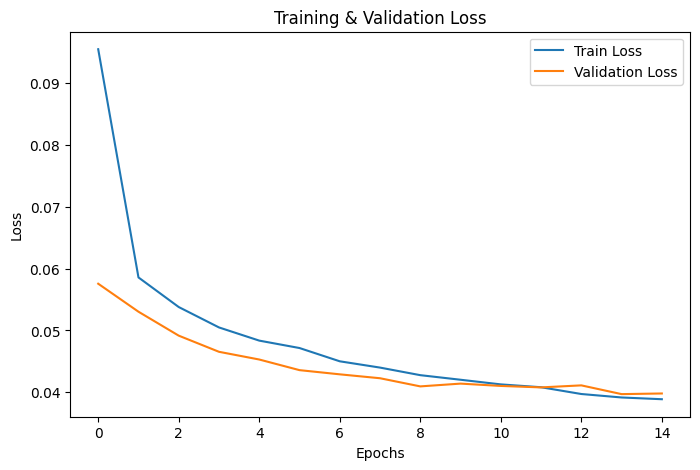

In [ ]:
# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

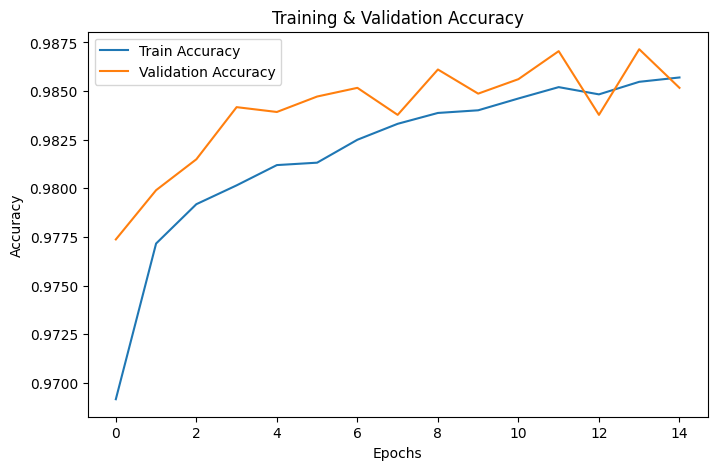

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()


Evaluate on test set

In [ ]:
test_loss, test_acc = model.evaluate(X_test_final, y_test_final, verbose=1)

print(f"Final Test Accuracy: {test_acc:.4f}")
print(f"Final Test Loss: {test_loss:.4f}")


705/705 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7818 - loss: 1.5367
Final Test Accuracy: 0.7779
Final Test Loss: 1.5743


Confusion Matrix

705/705 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


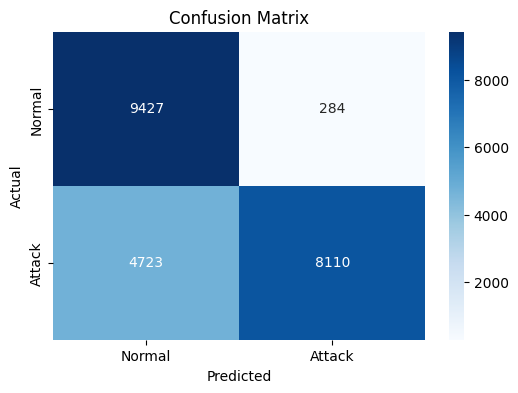

In [ ]:
# Get model predictions
y_pred = (model.predict(X_test_final) > 0.5).astype("int32")

cm = confusion_matrix(y_test_final, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print("Classification Report:\n", classification_report(y_test_final, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.97      0.79      9711
           1       0.97      0.63      0.76     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.80      0.78     22544
weighted avg       0.84      0.78      0.78     22544



Balanced GRU

In [ ]:
# Convert classes to NumPy array
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.array([0, 1]),
                                                  y=y_train)

# Convert to dictionary format required by Keras
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Train again with class weights
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=15,
                    batch_size=64,
                    class_weight=class_weight_dict,
                    verbose=1)

Epoch 1/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9856 - loss: 0.0399 - val_accuracy: 0.9872 - val_loss: 0.0392
Epoch 2/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9861 - loss: 0.0387 - val_accuracy: 0.9872 - val_loss: 0.0384
Epoch 3/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9863 - loss: 0.0377 - val_accuracy: 0.9873 - val_loss: 0.0389
Epoch 4/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9863 - loss: 0.0373 - val_accuracy: 0.9872 - val_loss: 0.0385
Epoch 5/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9869 - loss: 0.0377 - val_accuracy: 0.9872 - val_loss: 0.0379
Epoch 6/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9863 - loss: 0.0390 - val_accuracy: 0.9876 - val_loss: 0.0378
Epoch 7/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9870 - loss: 0.0362 - val_accuracy: 0.9844 - val_loss: 0.0405
Epoch 8/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9867 - loss: 0.0363

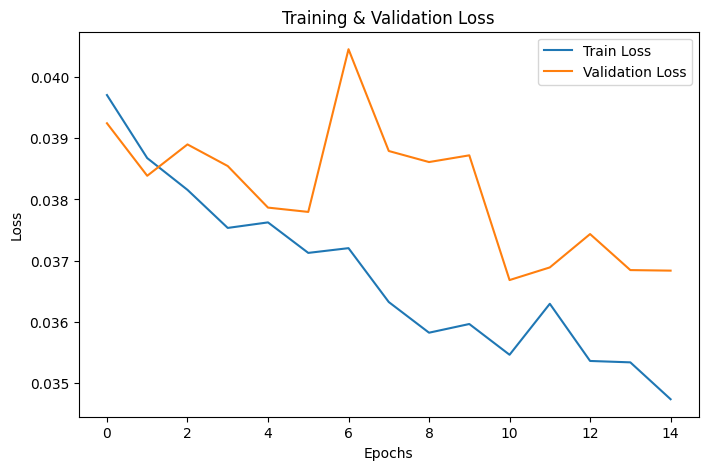

In [ ]:
# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

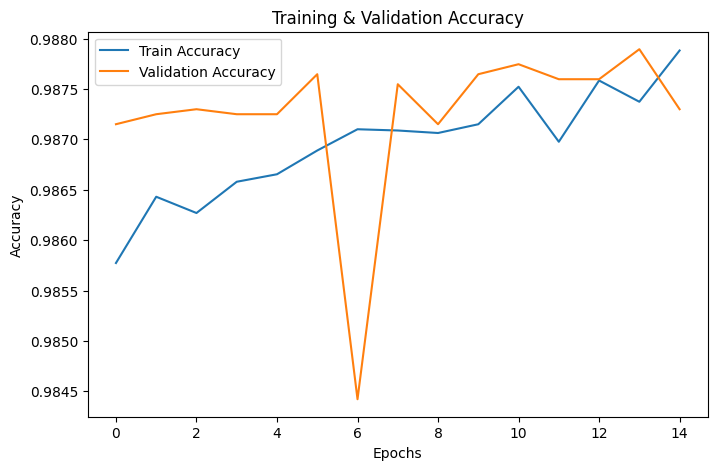

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

Evaluate on test set

In [ ]:
test_loss, test_acc = model.evaluate(X_test_final, y_test_final, verbose=1)

print(f"Final Test Accuracy: {test_acc:.4f}")
print(f"Final Test Loss: {test_loss:.4f}")

705/705 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7769 - loss: 1.7525
Final Test Accuracy: 0.7728
Final Test Loss: 1.7908


705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


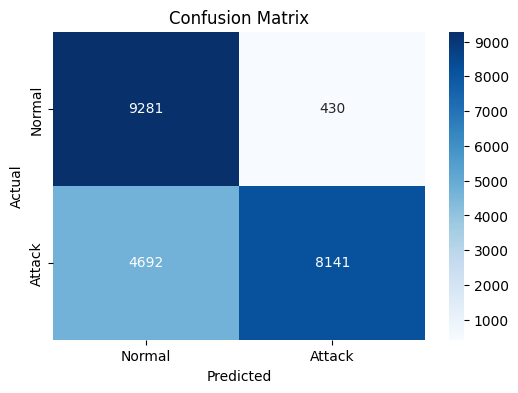

In [ ]:
# Get model predictions
y_pred = (model.predict(X_test_final) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test_final, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test_final, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.96      0.78      9711
           1       0.95      0.63      0.76     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.80      0.77     22544
weighted avg       0.83      0.77      0.77     22544



Further Gru Improvement attempts

In [ ]:
gru_model_optimized = Sequential([
    Input(shape=(1, 122)),  # Explicit Input Layer

    GRU(128, return_sequences=True),  # First GRU Layer
    BatchNormalization(),
    Dropout(0.4),

    GRU(64, return_sequences=True),  # Second GRU Layer
    BatchNormalization(),
    Dropout(0.3),

    GRU(32),  # Final GRU Layer (No return_sequences)
    BatchNormalization(),

    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [ ]:
def focal_loss(alpha=0.25, gamma=2.0):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)
        pt = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        loss = -K.mean(alpha * K.pow(1. - pt, gamma) * K.log(pt))
        return loss
    return focal_loss_fixed

# Compile Model
gru_model_optimized.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Lower LR for stability
                            loss=focal_loss(alpha=0.25, gamma=2.0),
                            metrics=['accuracy'])

allowing furthe epochs as it is DL

In [ ]:
history_gru_optimized = gru_model_optimized.fit(X_train, y_train,
                                                validation_data=(X_val, y_val),
                                                epochs=20,  # More epochs for better learning
                                                batch_size=128,  # Larger batch size for stability
                                                verbose=1)

Epoch 1/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9150 - loss: 0.0153 - val_accuracy: 0.9766 - val_loss: 0.0041
Epoch 2/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9721 - loss: 0.0053 - val_accuracy: 0.9809 - val_loss: 0.0035
Epoch 3/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9757 - loss: 0.0046 - val_accuracy: 0.9812 - val_loss: 0.0035
Epoch 4/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9779 - loss: 0.0042 - val_accuracy: 0.9826 - val_loss: 0.0034
Epoch 5/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9791 - loss: 0.0039 - val_accuracy: 0.9836 - val_loss: 0.0032
Epoch 6/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9800 - loss: 0.0037 - val_accuracy: 0.9835 - val_loss: 0.0032
Epoch 7/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9804 - loss: 0.0036 - val_accuracy: 0.9833 - val_loss: 0.0031
Epoch 8/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9816 - loss: 0.0035 - va

In [ ]:
test_loss_gru_optimized, test_acc_gru_optimized = gru_model_optimized.evaluate(X_test_final, y_test_final, verbose=1)

print(f"Final GRU Test Accuracy (Optimized Model): {test_acc_gru_optimized:.4f}")
print(f"Final GRU Test Loss (Optimized Model): {test_loss_gru_optimized:.4f}")

705/705 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7534 - loss: 0.1275
Final GRU Test Accuracy (Optimized Model): 0.7503
Final GRU Test Loss (Optimized Model): 0.1299


705/705 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


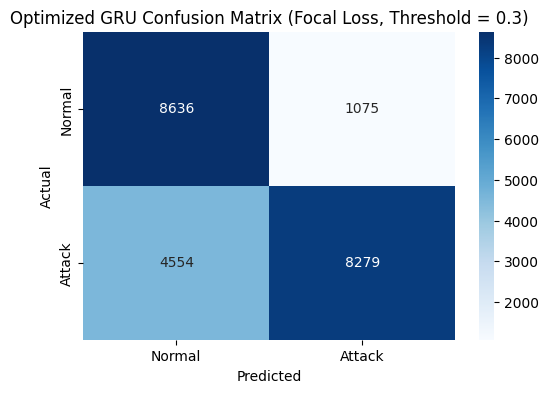

In [ ]:
y_pred_gru_optimized = (gru_model_optimized.predict(X_test_final) > 0.3).astype("int32")

cm_gru_optimized = confusion_matrix(y_test_final, y_pred_gru_optimized)

plt.figure(figsize=(6,4))
sns.heatmap(cm_gru_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Optimized GRU Confusion Matrix (Focal Loss, Threshold = 0.3)")
plt.show()

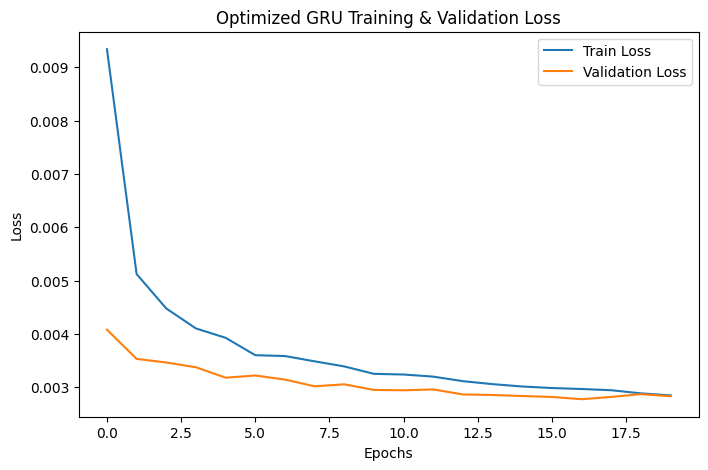

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_gru_optimized.history['loss'], label='Train Loss')
plt.plot(history_gru_optimized.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Optimized GRU Training & Validation Loss')
plt.legend()
plt.show()

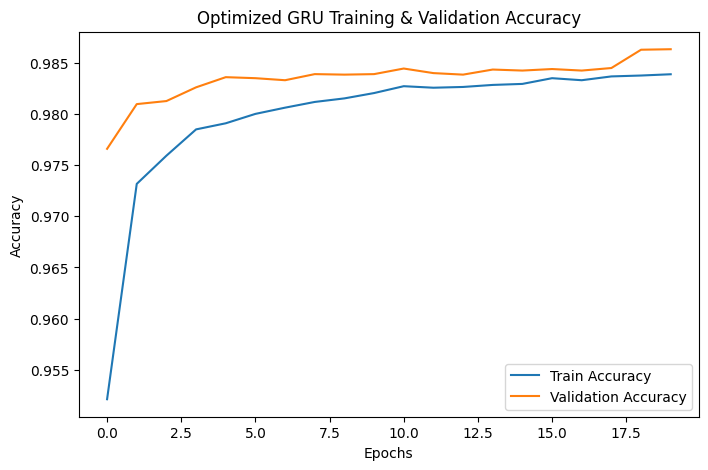

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_gru_optimized.history['accuracy'], label='Train Accuracy')
plt.plot(history_gru_optimized.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Optimized GRU Training & Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
print(" Optimized GRU Classification Report:\n", classification_report(y_test_final, y_pred_gru_optimized))

 Optimized GRU Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.89      0.75      9711
           1       0.89      0.65      0.75     12833

    accuracy                           0.75     22544
   macro avg       0.77      0.77      0.75     22544
weighted avg       0.79      0.75      0.75     22544



CNN

In [ ]:
# Define new CNN shape (12x12 = 144 features)
new_shape = (12, 12, 1)

# Pad features to 144 (from 122)
def pad_features(X, target_size=144):
    pad_size = target_size - X.shape[2]
    return np.pad(X, ((0, 0), (0, 0), (0, pad_size)), mode='constant')

X_train_padded = pad_features(X_train, 144)
X_val_padded = pad_features(X_val, 144)
X_test_padded = pad_features(X_test_final, 144)

# Reshape for CNN
X_train_cnn = X_train_padded.reshape(X_train.shape[0], new_shape[0], new_shape[1], new_shape[2])
X_val_cnn = X_val_padded.reshape(X_val.shape[0], new_shape[0], new_shape[1], new_shape[2])
X_test_cnn = X_test_padded.reshape(X_test_final.shape[0], new_shape[0], new_shape[1], new_shape[2])

# Final shape check
print("CNN X_train shape:", X_train_cnn.shape)
print("CNN X_val shape:", X_val_cnn.shape)
print("CNN X_test shape:", X_test_cnn.shape)

CNN X_train shape: (80622, 12, 12, 1)
CNN X_val shape: (20156, 12, 12, 1)
CNN X_test shape: (22544, 12, 12, 1)


In [ ]:
cnn_model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(12, 12, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile Model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,097 (391.00 KB)

 Trainable params: 99,713 (389.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
history_cnn = cnn_model.fit(X_train_cnn, y_train,
                            validation_data=(X_val_cnn, y_val),
                            epochs=15,
                            batch_size=64,
                            verbose=1)

Epoch 1/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.9626 - loss: 0.1142 - val_accuracy: 0.9800 - val_loss: 0.0687
Epoch 2/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.9797 - loss: 0.0594 - val_accuracy: 0.9780 - val_loss: 0.0708
Epoch 3/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9805 - loss: 0.0555 - val_accuracy: 0.9826 - val_loss: 0.0504
Epoch 4/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.9821 - loss: 0.0501 - val_accuracy: 0.9821 - val_loss: 0.0500
Epoch 5/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.9827 - loss: 0.0489 - val_accuracy: 0.9832 - val_loss: 0.0480
Epoch 6/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.9826 - loss: 0.0462 - val_accuracy: 0.9820 - val_loss: 0.0468
Epoch 7/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9837 - loss: 0.0447 - val_accuracy: 0.9823 - val_loss: 0.0471
Epoch 8/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9817 -

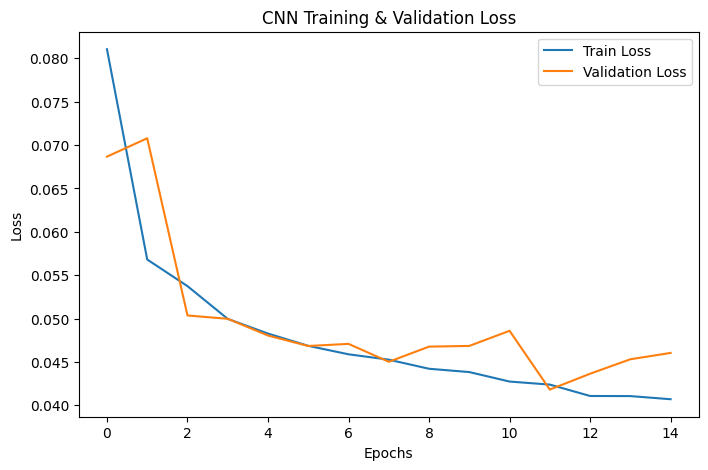

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Training & Validation Loss')
plt.legend()
plt.show()

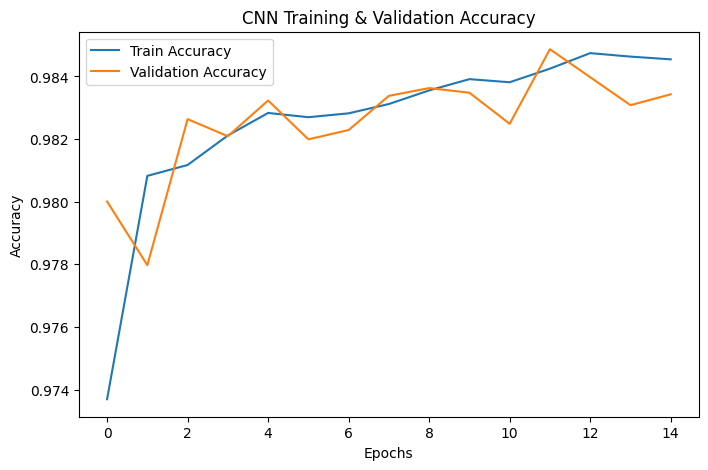

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Training & Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(X_test_cnn, y_test_final, verbose=1)

print(f"Final CNN Test Accuracy: {test_acc_cnn:.4f}")
print(f"Final CNN Test Loss: {test_loss_cnn:.4f}")

705/705 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7574 - loss: 2.7815
Final CNN Test Accuracy: 0.7548
Final CNN Test Loss: 2.8754


705/705 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


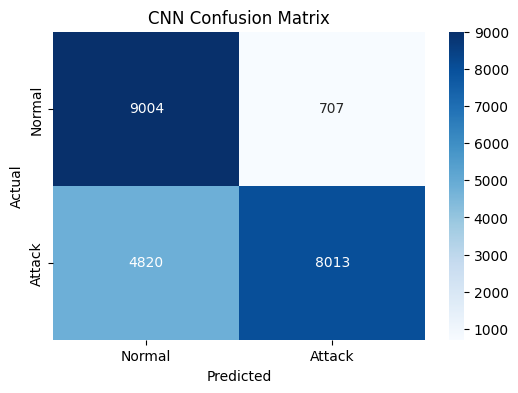

In [ ]:
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")

# Confusion Matrix
cm_cnn = confusion_matrix(y_test_final, y_pred_cnn)

plt.figure(figsize=(6,4))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CNN Confusion Matrix")
plt.show()

In [ ]:
print(" CNN Classification Report:\n", classification_report(y_test_final, y_pred_cnn))

 CNN Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.93      0.77      9711
           1       0.92      0.62      0.74     12833

    accuracy                           0.75     22544
   macro avg       0.79      0.78      0.75     22544
weighted avg       0.80      0.75      0.75     22544



CNN improvements

705/705 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


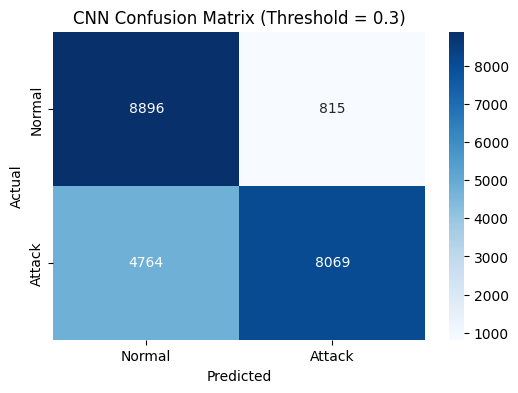

In [ ]:
# Lowering the decision threshold from 0.5 to 0.3
y_pred_cnn_threshold = (cnn_model.predict(X_test_cnn) > 0.3).astype("int32")

# Generate Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_threshold = confusion_matrix(y_test_final, y_pred_cnn_threshold)

plt.figure(figsize=(6,4))
sns.heatmap(cm_threshold, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CNN Confusion Matrix (Threshold = 0.3)")
plt.show()


In [ ]:
# Custom Focal Loss function
def focal_loss(alpha=0.25, gamma=2.0):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)
        pt = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        loss = -K.mean(alpha * K.pow(1. - pt, gamma) * K.log(pt))
        return loss
    return focal_loss_fixed

In [ ]:
# Compile CNN with manually implemented Focal Loss
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=focal_loss(alpha=0.25, gamma=2.0),
                  metrics=['accuracy'])

history_cnn_focal = cnn_model.fit(X_train_cnn, y_train,
                                  validation_data=(X_val_cnn, y_val),
                                  epochs=15,
                                  batch_size=64,
                                  verbose=1)

Epoch 1/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 54s 37ms/step - accuracy: 0.9842 - loss: 0.0030 - val_accuracy: 0.9837 - val_loss: 0.0032
Epoch 2/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.9837 - loss: 0.0029 - val_accuracy: 0.9836 - val_loss: 0.0034
Epoch 3/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9841 - loss: 0.0029 - val_accuracy: 0.9844 - val_loss: 0.0031
Epoch 4/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.9850 - loss: 0.0029 - val_accuracy: 0.9848 - val_loss: 0.0031
Epoch 5/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.9841 - loss: 0.0028 - val_accuracy: 0.9838 - val_loss: 0.0029
Epoch 6/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.9848 - loss: 0.0028 - val_accuracy: 0.9849 - val_loss: 0.0034
Epoch 7/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.9847 - loss: 0.0027 - val_accuracy: 0.9851 - val_loss: 0.0032
Epoch 8/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.9845 -

In [ ]:
test_loss_cnn_focal, test_acc_cnn_focal = cnn_model.evaluate(X_test_cnn, y_test_final, verbose=1)

print(f" Final CNN Test Accuracy (Focal Loss): {test_acc_cnn_focal:.4f}")
print(f" Final CNN Test Loss (Focal Loss): {test_loss_cnn_focal:.4f}")

705/705 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7525 - loss: 0.3745
 Final CNN Test Accuracy (Focal Loss): 0.7485
 Final CNN Test Loss (Focal Loss): 0.3787


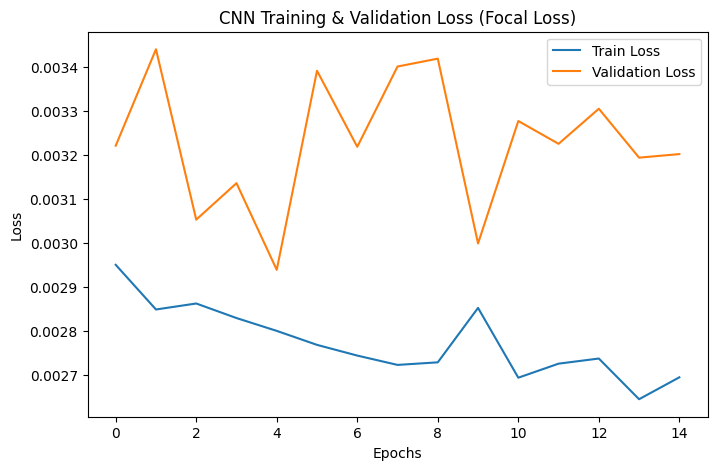

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_cnn_focal.history['loss'], label='Train Loss')
plt.plot(history_cnn_focal.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Training & Validation Loss (Focal Loss)')
plt.legend()
plt.show()

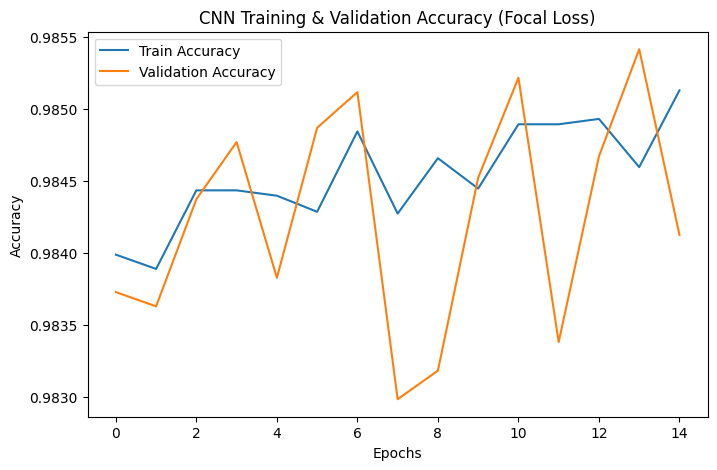

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_cnn_focal.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_focal.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Training & Validation Accuracy (Focal Loss)')
plt.legend()
plt.show()

705/705 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


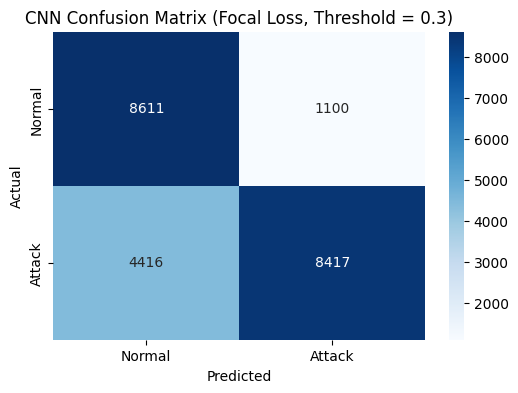

In [ ]:
# Get model predictions with threshold 0.3
y_pred_focal = (cnn_model.predict(X_test_cnn) > 0.3).astype("int32")

# Confusion Matrix
cm_focal = confusion_matrix(y_test_final, y_pred_focal)

plt.figure(figsize=(6,4))
sns.heatmap(cm_focal, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CNN Confusion Matrix (Focal Loss, Threshold = 0.3)")
plt.show()

In [ ]:
# Define Optimized CNN Model
cnn_model_optimized = Sequential([
    Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(12, 12, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(512, (3,3), activation='relu', padding='same'),  # Keeps feature map size larger
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
def focal_loss(alpha=0.25, gamma=2.0):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)
        pt = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        loss = -K.mean(alpha * K.pow(1. - pt, gamma) * K.log(pt))
        return loss
    return focal_loss_fixed

# Compiled Optimized CNN Model
cnn_model_optimized.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Lower LR for stability
                            loss=focal_loss(alpha=0.25, gamma=2.0),
                            metrics=['accuracy'])

In [ ]:
history_cnn_optimized = cnn_model_optimized.fit(X_train_cnn, y_train,
                                                validation_data=(X_val_cnn, y_val),
                                                epochs=20,  # More epochs for better learning
                                                batch_size=128,  # Larger batch size for stable updates
                                                verbose=1)

Epoch 1/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 426s 665ms/step - accuracy: 0.9479 - loss: 0.0251 - val_accuracy: 0.9749 - val_loss: 0.0058
Epoch 2/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 448s 674ms/step - accuracy: 0.9736 - loss: 0.0066 - val_accuracy: 0.9789 - val_loss: 0.0057
Epoch 3/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 442s 674ms/step - accuracy: 0.9764 - loss: 0.0054 - val_accuracy: 0.9818 - val_loss: 0.0043
Epoch 4/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 444s 677ms/step - accuracy: 0.9789 - loss: 0.0045 - val_accuracy: 0.9824 - val_loss: 0.0052
Epoch 5/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 441s 676ms/step - accuracy: 0.9791 - loss: 0.0040 - val_accuracy: 0.9770 - val_loss: 0.0046
Epoch 6/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 441s 674ms/step - accuracy: 0.9805 - loss: 0.0037 - val_accuracy: 0.9824 - val_loss: 0.0041
Epoch 7/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 441s 673ms/step - accuracy: 0.9812 - loss: 0.0034 - val_accuracy: 0.9817 - val_loss: 0.0046
Epoch 8/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 419s 665ms/step - accuracy: 0.9816 -

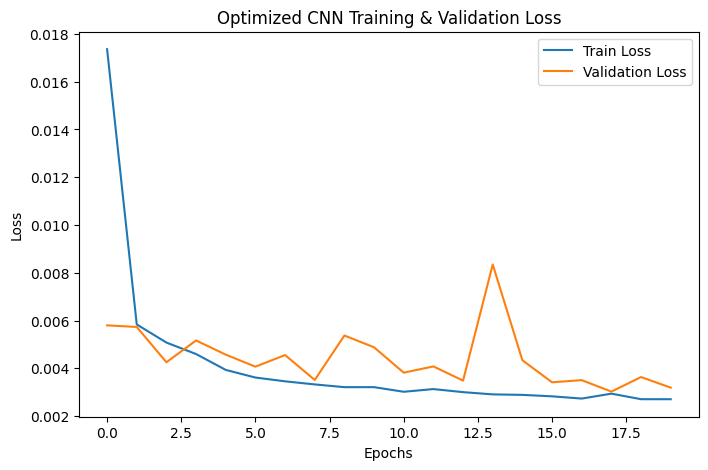

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_cnn_optimized.history['loss'], label='Train Loss')
plt.plot(history_cnn_optimized.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Optimized CNN Training & Validation Loss')
plt.legend()
plt.show()

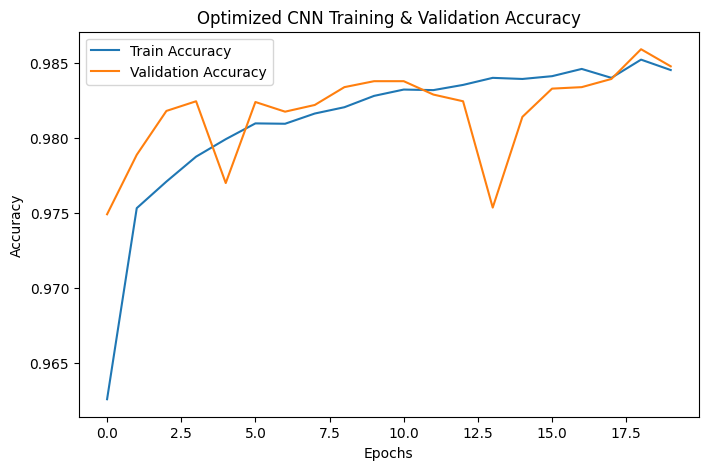

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_cnn_optimized.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_optimized.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Optimized CNN Training & Validation Accuracy')
plt.legend()
plt.show()

705/705 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step


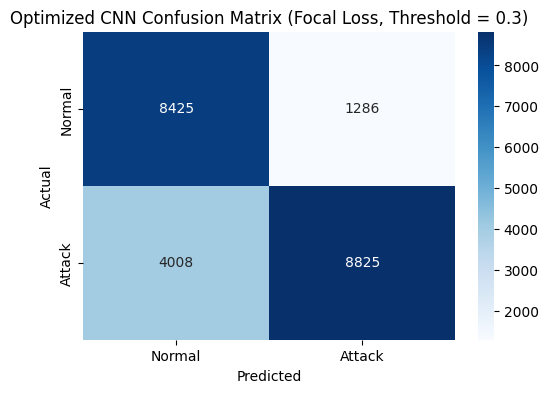

In [ ]:
y_pred_optimized = (cnn_model_optimized.predict(X_test_cnn) > 0.3).astype("int32")

cm_optimized = confusion_matrix(y_test_final, y_pred_optimized)

plt.figure(figsize=(6,4))
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Optimized CNN Confusion Matrix (Focal Loss, Threshold = 0.3)")
plt.show()

In [ ]:
test_loss_cnn_optimized, test_acc_cnn_optimized = cnn_model_optimized.evaluate(X_test_cnn, y_test_final, verbose=1)

print(f"Final CNN Test Accuracy (Optimized Model): {test_acc_cnn_optimized:.4f}")
print(f"Final CNN Test Loss (Optimized Model): {test_loss_cnn_optimized:.4f}")

705/705 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.7490 - loss: 0.1563
Final CNN Test Accuracy (Optimized Model): 0.7446
Final CNN Test Loss (Optimized Model): 0.1604


In [ ]:
print("Optimized CNN Classification Report:\n", classification_report(y_test_final, y_pred_optimized))

Optimized CNN Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.87      0.76      9711
           1       0.87      0.69      0.77     12833

    accuracy                           0.77     22544
   macro avg       0.78      0.78      0.77     22544
weighted avg       0.79      0.77      0.77     22544



LTSM

In [ ]:
lstm_model_unoptimized = Sequential([
    Input(shape=(1, 122)),

    LSTM(128, return_sequences=True),
    Dropout(0.2),

    LSTM(64, return_sequences=True),
    Dropout(0.2),

    LSTM(32),
    Dropout(0.2),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  #
])

In [ ]:
lstm_model_unoptimized.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Default LR
                               loss='binary_crossentropy',
                               metrics=['accuracy'])

In [ ]:
history_lstm_unoptimized = lstm_model_unoptimized.fit(X_train, y_train,
                                                      validation_data=(X_val, y_val),
                                                      epochs=15,
                                                      batch_size=64,
                                                      verbose=1)

Epoch 1/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - accuracy: 0.9464 - loss: 0.1615 - val_accuracy: 0.9807 - val_loss: 0.0550
Epoch 2/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9799 - loss: 0.0534 - val_accuracy: 0.9830 - val_loss: 0.0492
Epoch 3/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9817 - loss: 0.0482 - val_accuracy: 0.9833 - val_loss: 0.0481
Epoch 4/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9824 - loss: 0.0462 - val_accuracy: 0.9833 - val_loss: 0.0445
Epoch 5/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9820 - loss: 0.0464 - val_accuracy: 0.9841 - val_loss: 0.0438
Epoch 6/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9834 - loss: 0.0425 - val_accuracy: 0.9841 - val_loss: 0.0427
Epoch 7/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9850 - loss: 0.0407 - val_accuracy: 0.9832 - val_loss: 0.0461
Epoch 8/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9847 -

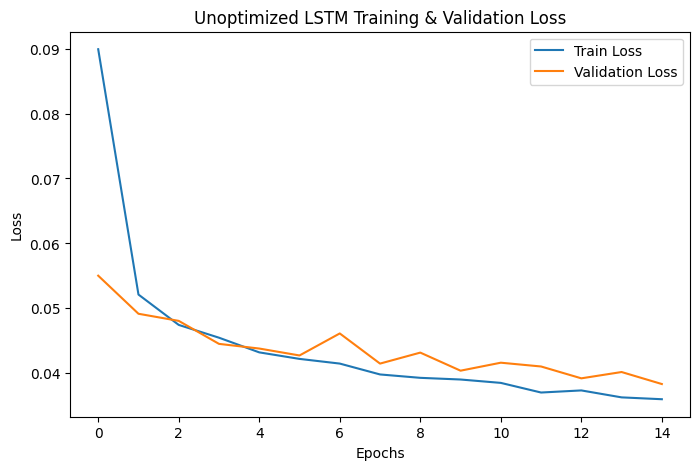

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_lstm_unoptimized.history['loss'], label='Train Loss')
plt.plot(history_lstm_unoptimized.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Unoptimized LSTM Training & Validation Loss')
plt.legend()
plt.show()

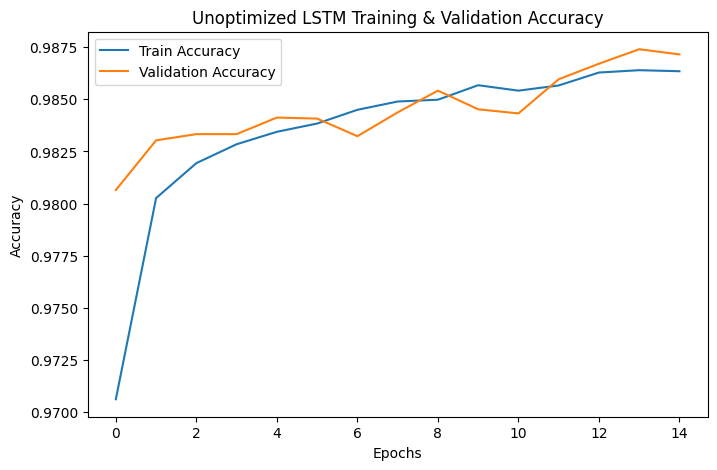

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_lstm_unoptimized.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm_unoptimized.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Unoptimized LSTM Training & Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss_lstm_unoptimized, test_acc_lstm_unoptimized = lstm_model_unoptimized.evaluate(X_test_final, y_test_final, verbose=1)

print(f"Unoptimized LSTM Test Accuracy: {test_acc_lstm_unoptimized:.4f}")
print(f"Unoptimized LSTM Test Loss: {test_loss_lstm_unoptimized:.4f}")

705/705 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7700 - loss: 1.7972
Unoptimized LSTM Test Accuracy: 0.7660
Unoptimized LSTM Test Loss: 1.8412


705/705 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step


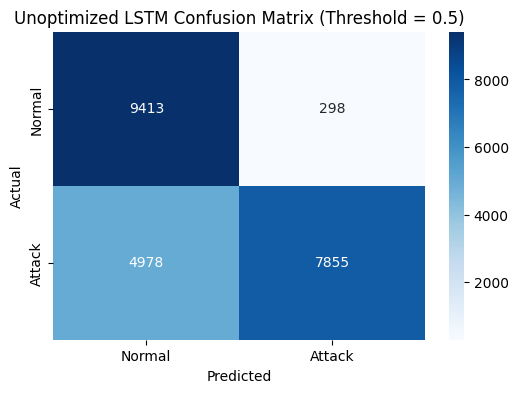

In [ ]:
y_pred_lstm_unoptimized = (lstm_model_unoptimized.predict(X_test_final) > 0.5).astype("int32")

cm_lstm_unoptimized = confusion_matrix(y_test_final, y_pred_lstm_unoptimized)

plt.figure(figsize=(6,4))
sns.heatmap(cm_lstm_unoptimized, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Unoptimized LSTM Confusion Matrix (Threshold = 0.5)")
plt.show()

In [ ]:
print("Unoptimized LSTM Classification Report:\n", classification_report(y_test_final, y_pred_lstm_unoptimized))

Unoptimized LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78      9711
           1       0.96      0.61      0.75     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.79      0.76     22544
weighted avg       0.83      0.77      0.76     22544



LTSM Improved

In [ ]:
lstm_model_optimized = Sequential([
    Input(shape=(1, 122)),  # Explicit Input Layer

    LSTM(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.4),

    LSTM(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(32),
    BatchNormalization(),

    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
def focal_loss(alpha=0.25, gamma=2.0):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)
        pt = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        loss = -K.mean(alpha * K.pow(1. - pt, gamma) * K.log(pt))
        return loss
    return focal_loss_fixed

lstm_model_optimized.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Lower LR for stability
                             loss=focal_loss(alpha=0.25, gamma=2.0),
                             metrics=['accuracy'])


In [ ]:
history_lstm_optimized = lstm_model_optimized.fit(X_train, y_train,
                                                  validation_data=(X_val, y_val),
                                                  epochs=20,  # More epochs for better learning
                                                  batch_size=128,  # Larger batch size for stability
                                                  verbose=1)

Epoch 1/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.9111 - loss: 0.0141 - val_accuracy: 0.9776 - val_loss: 0.0041
Epoch 2/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9735 - loss: 0.0049 - val_accuracy: 0.9817 - val_loss: 0.0036
Epoch 3/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9763 - loss: 0.0044 - val_accuracy: 0.9823 - val_loss: 0.0033
Epoch 4/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9773 - loss: 0.0042 - val_accuracy: 0.9827 - val_loss: 0.0032
Epoch 5/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9808 - loss: 0.0037 - val_accuracy: 0.9836 - val_loss: 0.0031
Epoch 6/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9813 - loss: 0.0035 - val_accuracy: 0.9834 - val_loss: 0.0031
Epoch 7/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9817 - loss: 0.0035 - val_accuracy: 0.9842 - val_loss: 0.0032
Epoch 8/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9822 - loss: 0.0032 - val

In [ ]:
test_loss_lstm_optimized, test_acc_lstm_optimized = lstm_model_optimized.evaluate(X_test_final, y_test_final, verbose=1)

print(f" Final LSTM Test Accuracy (Optimized Model): {test_acc_lstm_optimized:.4f}")
print(f" Final LSTM Test Loss (Optimized Model): {test_loss_lstm_optimized:.4f}")

705/705 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7532 - loss: 0.1449
 Final LSTM Test Accuracy (Optimized Model): 0.7508
 Final LSTM Test Loss (Optimized Model): 0.1466


705/705 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step


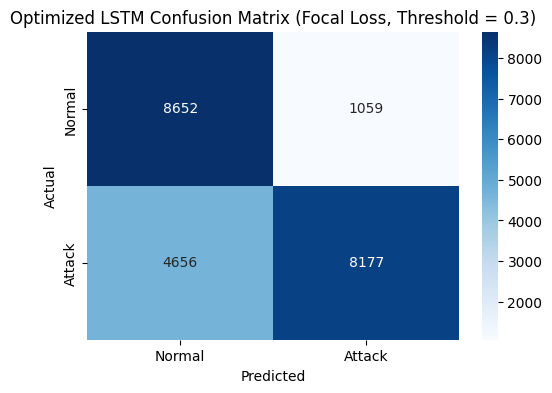

In [ ]:
y_pred_lstm_optimized = (lstm_model_optimized.predict(X_test_final) > 0.3).astype("int32")

cm_lstm_optimized = confusion_matrix(y_test_final, y_pred_lstm_optimized)

plt.figure(figsize=(6,4))
sns.heatmap(cm_lstm_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Optimized LSTM Confusion Matrix (Focal Loss, Threshold = 0.3)")
plt.show()

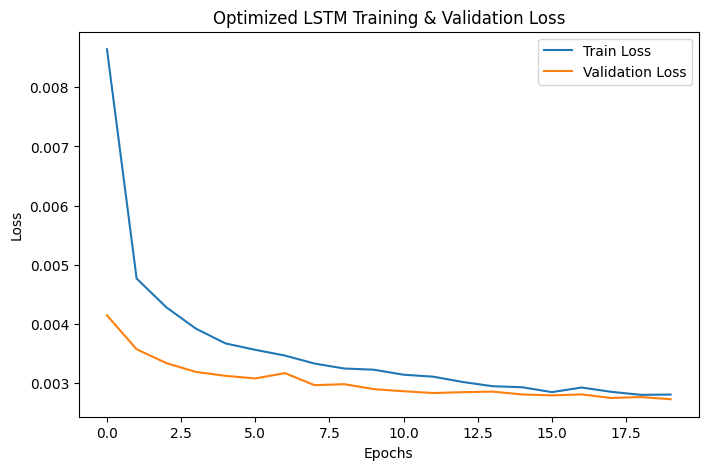

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_lstm_optimized.history['loss'], label='Train Loss')
plt.plot(history_lstm_optimized.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Optimized LSTM Training & Validation Loss')
plt.legend()
plt.show()

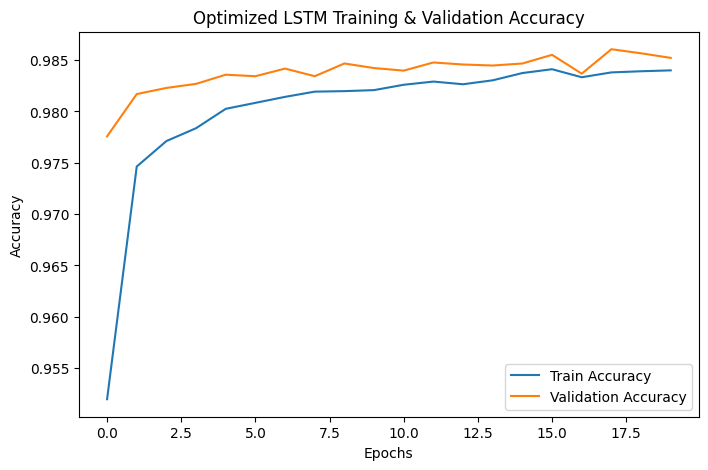

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_lstm_optimized.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm_optimized.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Optimized LSTM Training & Validation Accuracy')
plt.legend()
plt.show()

DNN

In [ ]:
dnn_model_unoptimized = Sequential([
    Input(shape=(122,)),  # Correct input shape (samples, features)

    Dense(256, activation='relu'),
    Dropout(0.2),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

In [ ]:
dnn_model_unoptimized.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                              loss='binary_crossentropy',

In [ ]:
history_dnn_unoptimized = dnn_model_unoptimized.fit(X_train_dnn, y_train,
                                                    validation_data=(X_val_dnn, y_val),
                                                    epochs=15,
                                                    batch_size=64,
                                                    verbose=1)

Epoch 1/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9638 - loss: 0.1156 - val_accuracy: 0.9847 - val_loss: 0.0485
Epoch 2/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9816 - loss: 0.0496 - val_accuracy: 0.9829 - val_loss: 0.0525
Epoch 3/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9839 - loss: 0.0439 - val_accuracy: 0.9813 - val_loss: 0.0472
Epoch 4/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9842 - loss: 0.0414 - val_accuracy: 0.9848 - val_loss: 0.0423
Epoch 5/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9848 - loss: 0.0403 - val_accuracy: 0.9840 - val_loss: 0.0411
Epoch 6/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9853 - loss: 0.0400 - val_accuracy: 0.9860 - val_loss: 0.0419
Epoch 7/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9851 - loss: 0.0392 - val_accuracy: 0.9840 - val_loss: 0.0453
Epoch 8/15
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9853 - loss: 0.03

In [ ]:
test_loss_dnn_unoptimized, test_acc_dnn_unoptimized = dnn_model_unoptimized.evaluate(X_test_dnn, y_test_final, verbose=1)

print(f"Unoptimized DNN Test Accuracy: {test_acc_dnn_unoptimized:.4f}")
print(f"Unoptimized DNN Test Loss: {test_loss_dnn_unoptimized:.4f}")

705/705 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7550 - loss: 2.7732
Unoptimized DNN Test Accuracy: 0.7528
Unoptimized DNN Test Loss: 2.8542


705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


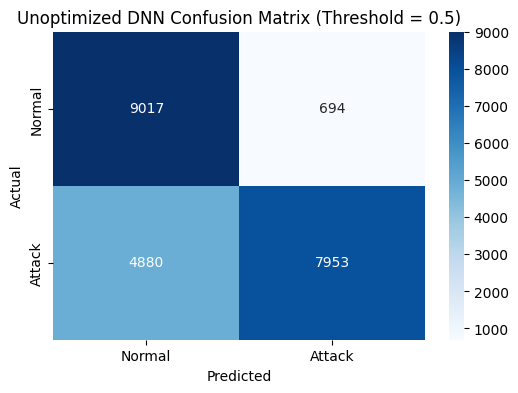

In [ ]:
y_pred_dnn_unoptimized = (dnn_model_unoptimized.predict(X_test_dnn) > 0.5).astype("int32")

cm_dnn_unoptimized = confusion_matrix(y_test_final, y_pred_dnn_unoptimized)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dnn_unoptimized, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Unoptimized DNN Confusion Matrix (Threshold = 0.5)")
plt.show()

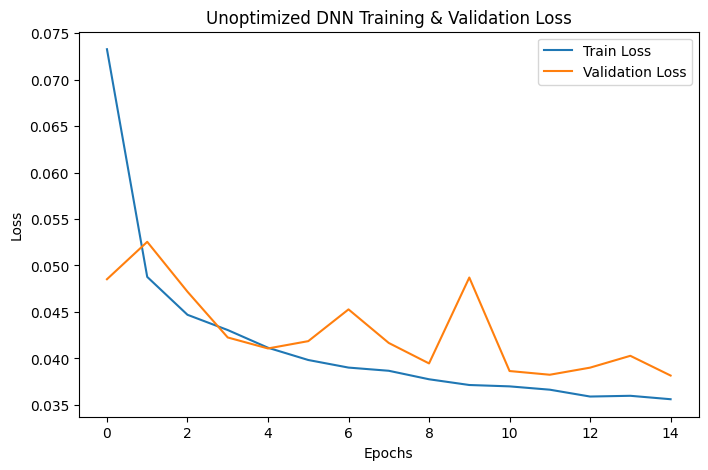

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_dnn_unoptimized.history['loss'], label='Train Loss')
plt.plot(history_dnn_unoptimized.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Unoptimized DNN Training & Validation Loss')
plt.legend()
plt.show()

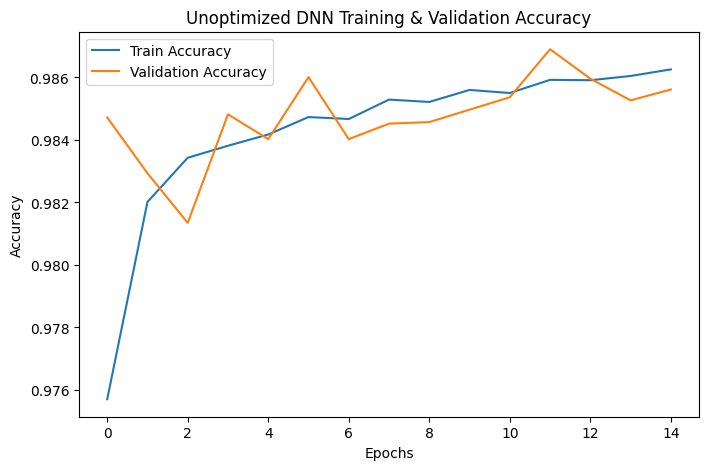

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_dnn_unoptimized.history['accuracy'], label='Train Accuracy')
plt.plot(history_dnn_unoptimized.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Unoptimized DNN Training & Validation Accuracy')
plt.legend()
plt.show()

DNN Improved

In [ ]:
dnn_model_optimized = Sequential([
    Input(shape=(122,)),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),

    Dense(1, activation='sigmoid')
])

dnn_model_optimized.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                            loss=focal_loss(alpha=0.25, gamma=2.0),
                            metrics=['accuracy'])

In [ ]:
def focal_loss(alpha=0.25, gamma=2.0):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)
        pt = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        loss = -K.mean(alpha * K.pow(1. - pt, gamma) * K.log(pt))
        return loss
    return focal_loss_fixed

dnn_model_optimized.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Lower LR for stability
                            loss=focal_loss(alpha=0.25, gamma=2.0),
                            metrics=['accuracy'])

In [ ]:
# Reshape input data for DNN (Remove time step dimension)
X_train_dnn = X_train.reshape(X_train.shape[0], X_train.shape[2])  # (samples, features)
X_val_dnn = X_val.reshape(X_val.shape[0], X_val.shape[2])
X_test_dnn = X_test_final.reshape(X_test_final.shape[0], X_test_final.shape[2])

# Confirm new shape
print(f"DNN X_train shape: {X_train_dnn.shape}")
print(f"DNN X_val shape: {X_val_dnn.shape}")
print(f"DNN X_test shape: {X_test_dnn.shape}")

DNN X_train shape: (80622, 122)
DNN X_val shape: (20156, 122)
DNN X_test shape: (22544, 122)


Error Fixing

In [ ]:
# Clear TensorFlow session
K.clear_session()
tf.keras.backend.clear_session()
print("TensorFlow session cleared.")

TensorFlow session cleared.


In [ ]:
history_dnn_optimized = dnn_model_optimized.fit(X_train_dnn, y_train,
                                                validation_data=(X_val_dnn, y_val),
                                                epochs=20,
                                                batch_size=128,
                                                verbose=1)


Epoch 1/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9349 - loss: 0.0158 - val_accuracy: 0.9787 - val_loss: 0.0043
Epoch 2/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9744 - loss: 0.0052 - val_accuracy: 0.9810 - val_loss: 0.0042
Epoch 3/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9779 - loss: 0.0043 - val_accuracy: 0.9831 - val_loss: 0.0036
Epoch 4/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9803 - loss: 0.0038 - val_accuracy: 0.9830 - val_loss: 0.0035
Epoch 5/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9800 - loss: 0.0038 - val_accuracy: 0.9839 - val_loss: 0.0033
Epoch 6/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9820 - loss: 0.0033 - val_accuracy: 0.9840 - val_loss: 0.0033
Epoch 7/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9823 - loss: 0.0033 - val_accuracy: 0.9835 - val_loss: 0.0031
Epoch 8/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9824 - loss: 0.0033 - val

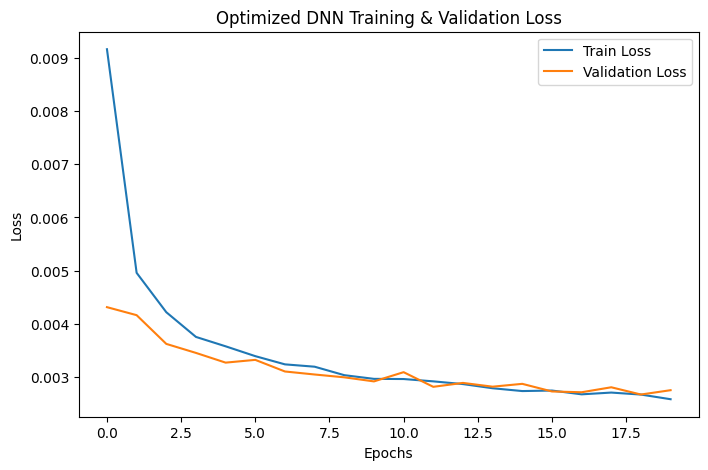

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_dnn_optimized.history['loss'], label='Train Loss')
plt.plot(history_dnn_optimized.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Optimized DNN Training & Validation Loss')
plt.legend()
plt.show()

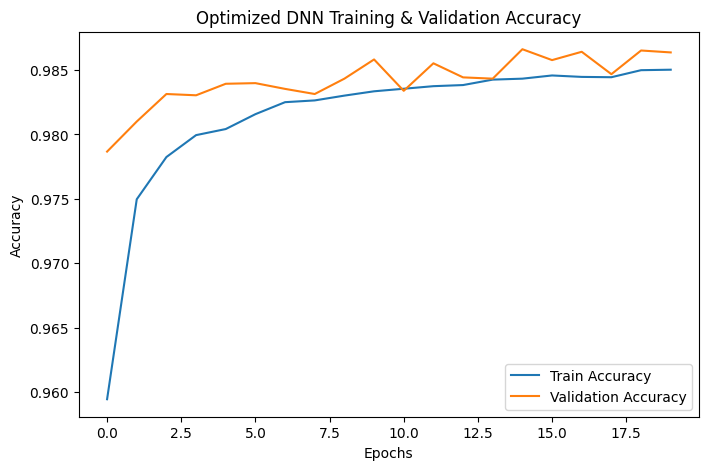

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_dnn_optimized.history['accuracy'], label='Train Accuracy')
plt.plot(history_dnn_optimized.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Optimized DNN Training & Validation Accuracy')
plt.legend()
plt.show()

705/705 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


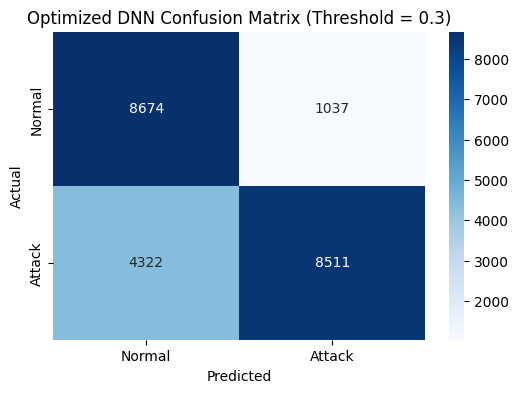

In [ ]:
# Apply the 0.3 threshold
y_pred_dnn_optimized = (dnn_model_optimized.predict(X_test_dnn) > 0.3).astype("int32")

cm_dnn_optimized = confusion_matrix(y_test_final, y_pred_dnn_optimized)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dnn_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Optimized DNN Confusion Matrix (Threshold = 0.3)")
plt.show()

In [ ]:
print("Optimized DNN Classification Report:\n", classification_report(y_test_final, y_pred_dnn_optimized))

Optimized DNN Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76      9711
           1       0.89      0.66      0.76     12833

    accuracy                           0.76     22544
   macro avg       0.78      0.78      0.76     22544
weighted avg       0.79      0.76      0.76     22544



SDG

In [ ]:
sgd_svm_unoptimized = SGDClassifier(loss='hinge',  # Standard SVM loss
                                    max_iter=1000,
                                    tol=1e-3,  # Stop early if no improvement
                                    random_state=42)

sgd_svm_unoptimized.fit(X_train_dnn, y_train)
print("Unoptimized SGD SVM training complete!")

Unoptimized SGD SVM training complete!


In [ ]:
sgd_svm_unoptimized_acc = sgd_svm_unoptimized.score(X_test_dnn, y_test_final)
print(f"Unoptimized SGD SVM Test Accuracy: {sgd_svm_unoptimized_acc:.4f}")

Unoptimized SGD SVM Test Accuracy: 0.7672


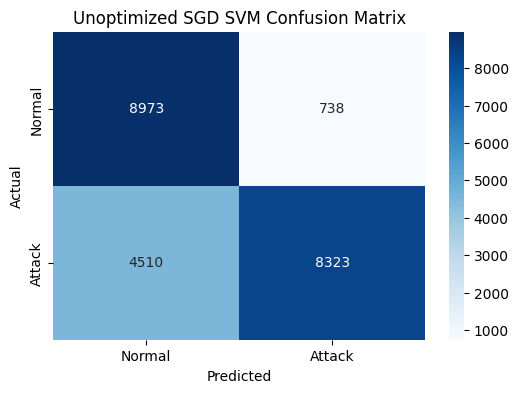

In [ ]:
y_pred_sgd_unoptimized = sgd_svm_unoptimized.predict(X_test_dnn)

cm_sgd_unoptimized = confusion_matrix(y_test_final, y_pred_sgd_unoptimized)

plt.figure(figsize=(6,4))
sns.heatmap(cm_sgd_unoptimized, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Unoptimized SGD SVM Confusion Matrix")
plt.show()

In [ ]:
print("Unoptimized SGD SVM Classification Report:\n", classification_report(y_test_final, y_pred_sgd_unoptimized))

Unoptimized SGD SVM Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.92      0.77      9711
           1       0.92      0.65      0.76     12833

    accuracy                           0.77     22544
   macro avg       0.79      0.79      0.77     22544
weighted avg       0.81      0.77      0.77     22544



SDG opt

In [ ]:
# Define an Optimized SGD SVM with Feature Scaling
sgd_svm_optimized = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svm', SGDClassifier(loss='hinge',
                          max_iter=5000,  # More iterations for better convergence
                          tol=1e-4,  # Smaller tolerance (more precise optimization)
                          alpha=0.0001,  # Regularization strength (prevents overfitting)
                          learning_rate='optimal',  # Adaptive learning rate
                          early_stopping=True,  # Stops early if no improvement
                          random_state=42))
])

sgd_svm_optimized.fit(X_train_dnn, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SGDClassifier(early_stopping=True, max_iter=5000,
                               random_state=42, tol=0.0001))])

In [ ]:
sgd_svm_optimized_acc = sgd_svm_optimized.score(X_test_dnn, y_test_final)
print(f"Optimized SGD SVM Test Accuracy: {sgd_svm_optimized_acc:.4f}")

Optimized SGD SVM Test Accuracy: 0.7517


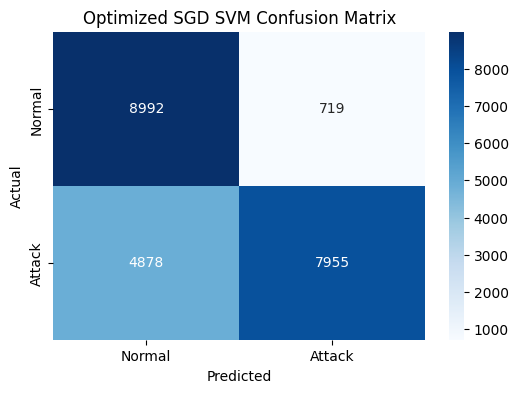

In [ ]:
y_pred_sgd_optimized = sgd_svm_optimized.predict(X_test_dnn)

cm_sgd_optimized = confusion_matrix(y_test_final, y_pred_sgd_optimized)

plt.figure(figsize=(6,4))
sns.heatmap(cm_sgd_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Optimized SGD SVM Confusion Matrix")
plt.show()

In [ ]:
print("Optimized SGD SVM Classification Report:\n", classification_report(y_test_final, y_pred_sgd_optimized))

Optimized SGD SVM Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.93      0.76      9711
           1       0.92      0.62      0.74     12833

    accuracy                           0.75     22544
   macro avg       0.78      0.77      0.75     22544
weighted avg       0.80      0.75      0.75     22544



LR

In [ ]:
lr_unoptimized = LogisticRegression(max_iter=1000, random_state=42)  # Default settings

lr_unoptimized.fit(X_train_dnn, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
lr_unoptimized_acc = lr_unoptimized.score(X_test_dnn, y_test_final)
print(f" Unoptimized LR Test Accuracy: {lr_unoptimized_acc:.4f}")

 Unoptimized LR Test Accuracy: 0.7543


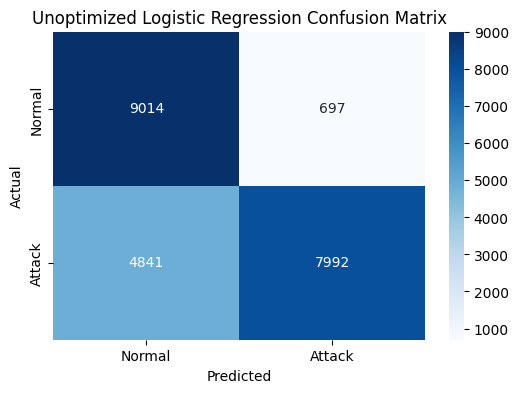

In [ ]:
y_pred_lr_unoptimized = lr_unoptimized.predict(X_test_dnn)

cm_lr_unoptimized = confusion_matrix(y_test_final, y_pred_lr_unoptimized)

plt.figure(figsize=(6,4))
sns.heatmap(cm_lr_unoptimized, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Unoptimized Logistic Regression Confusion Matrix")
plt.show()

LR optim

In [ ]:
lr_optimized = Pipeline([
    ('scaler', StandardScaler()),  # Feature Scaling
    ('lr', LogisticRegression(max_iter=5000, C=0.1, solver='liblinear', random_state=42))  # Regularization & solver tuning
])

lr_optimized.fit(X_train_dnn, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.1, max_iter=5000, random_state=42,
                                    solver='liblinear'))])

In [ ]:
lr_optimized_acc = lr_optimized.score(X_test_dnn, y_test_final)
print(f"Optimized LR Test Accuracy: {lr_optimized_acc:.4f}")

Optimized LR Test Accuracy: 0.7537


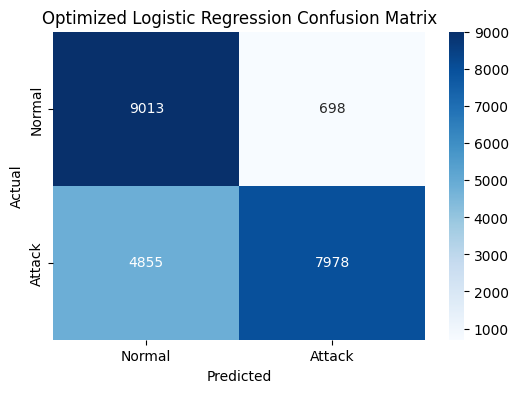

In [ ]:
y_pred_lr_optimized = lr_optimized.predict(X_test_dnn)

cm_lr_optimized = confusion_matrix(y_test_final, y_pred_lr_optimized)

plt.figure(figsize=(6,4))
sns.heatmap(cm_lr_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Optimized Logistic Regression Confusion Matrix")
plt.show()

In [ ]:
print(" Unoptimized LR Classification Report:\n", classification_report(y_test_final, y_pred_lr_unoptimized))
print("\n Optimized LR Classification Report:\n", classification_report(y_test_final, y_pred_lr_optimized))

 Unoptimized LR Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.93      0.77      9711
           1       0.92      0.62      0.74     12833

    accuracy                           0.75     22544
   macro avg       0.79      0.78      0.75     22544
weighted avg       0.80      0.75      0.75     22544


 Optimized LR Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.93      0.76      9711
           1       0.92      0.62      0.74     12833

    accuracy                           0.75     22544
   macro avg       0.78      0.77      0.75     22544
weighted avg       0.80      0.75      0.75     22544



GB

In [ ]:
gb_unoptimized = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Default settings

gb_unoptimized.fit(X_train_dnn, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
gb_unoptimized_acc = gb_unoptimized.score(X_test_dnn, y_test_final)
print(f" Unoptimized GB Test Accuracy: {gb_unoptimized_acc:.4f}")

 Unoptimized GB Test Accuracy: 0.7799


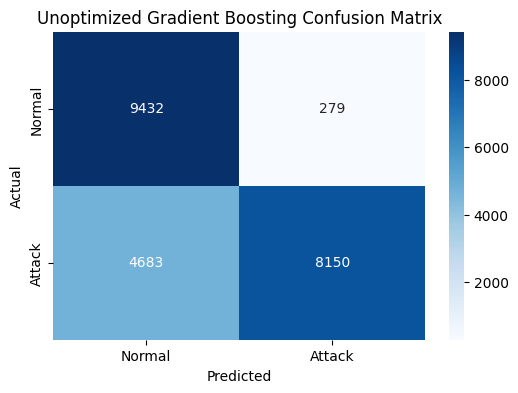

In [ ]:
y_pred_gb_unoptimized = gb_unoptimized.predict(X_test_dnn)

cm_gb_unoptimized = confusion_matrix(y_test_final, y_pred_gb_unoptimized)

plt.figure(figsize=(6,4))
sns.heatmap(cm_gb_unoptimized, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Unoptimized Gradient Boosting Confusion Matrix")
plt.show()

GB Optim

In [ ]:
gb_optimized = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)

gb_optimized.fit(X_train_dnn, y_train)
print(" Optimized GB training complete!")

 Optimized GB training complete!


In [ ]:
gb_optimized_acc = gb_optimized.score(X_test_dnn, y_test_final)
print(f" Optimized GB Test Accuracy: {gb_optimized_acc:.4f}")

NameError: name 'gb_optimized' is not defined

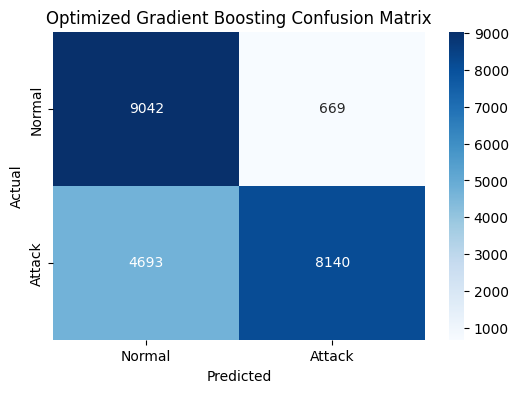

In [ ]:
y_pred_gb_optimized = gb_optimized.predict(X_test_dnn)

cm_gb_optimized = confusion_matrix(y_test_final, y_pred_gb_optimized)

plt.figure(figsize=(6,4))
sns.heatmap(cm_gb_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Optimized Gradient Boosting Confusion Matrix")
plt.show()

KNN

In [ ]:
knn_unoptimized = KNeighborsClassifier(n_neighbors=5)  # Default: 5 neighbors

knn_unoptimized.fit(X_train_dnn, y_train)

KNeighborsClassifier()

In [ ]:
knn_unoptimized_acc = knn_unoptimized.score(X_test_dnn, y_test_final)
print(f"Unoptimized KNN Test Accuracy: {knn_unoptimized_acc:.4f}")

Unoptimized KNN Test Accuracy: 0.7590


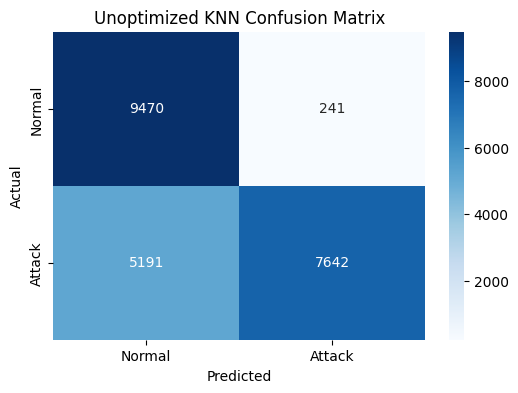

In [ ]:
y_pred_knn_unoptimized = knn_unoptimized.predict(X_test_dnn)

cm_knn_unoptimized = confusion_matrix(y_test_final, y_pred_knn_unoptimized)

plt.figure(figsize=(6,4))
sns.heatmap(cm_knn_unoptimized, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Unoptimized KNN Confusion Matrix")
plt.show()

KNN Optimise

In [ ]:
knn_optimized = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='manhattan')

knn_optimized.fit(X_train_dnn, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

In [ ]:
knn_optimized_acc = knn_optimized.score(X_test_dnn, y_test_final)
print(f"Optimized KNN Test Accuracy: {knn_optimized_acc:.4f}")

Optimized KNN Test Accuracy: 0.7562


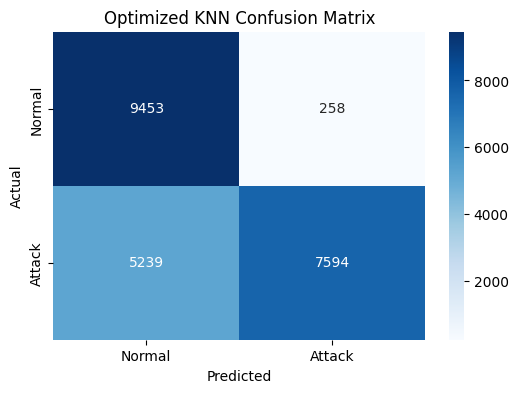

In [ ]:
y_pred_knn_optimized = knn_optimized.predict(X_test_dnn)

cm_knn_optimized = confusion_matrix(y_test_final, y_pred_knn_optimized)

plt.figure(figsize=(6,4))
sns.heatmap(cm_knn_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Optimized KNN Confusion Matrix")
plt.show()

Results

In [ ]:
print("SGD SVM Optimized Accuracy:", sgd_svm_optimized_acc)
print("LR Optimized Accuracy:", lr_optimized_acc)
print("GB Optimized Accuracy:", gb_optimized_acc)
print("KNN Optimized Accuracy:", knn_optimized_acc)

SGD SVM Optimized Accuracy: 0.7517299503193754
LR Optimized Accuracy: 0.7536816891412349
GB Optimized Accuracy: 0.7621540099361249
KNN Optimized Accuracy: 0.756165720369056


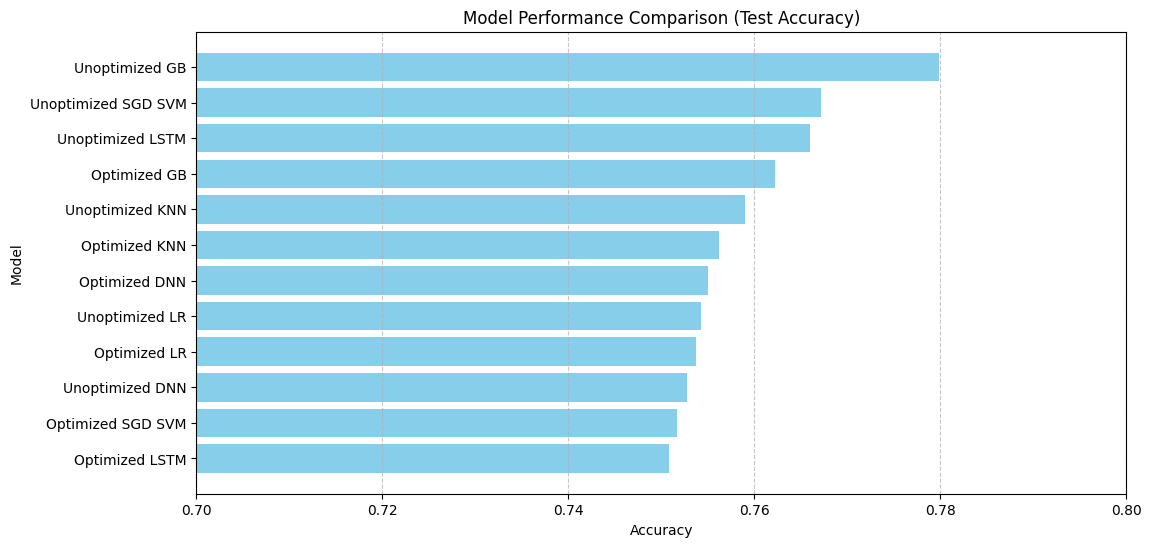

In [ ]:
# Extract model names and their respective accuracies
models = {
    "Unoptimized LSTM": 0.7660,
    "Optimized LSTM": 0.7508,
    "Unoptimized DNN": 0.7528,
    "Optimized DNN": 0.7550,
    "Unoptimized SGD SVM": 0.7672,
    "Optimized SGD SVM": 0.7517,
    "Unoptimized LR": 0.7543,
    "Optimized LR": 0.7537,
    "Unoptimized GB": 0.7799,
    "Optimized GB": 0.7622,
    "Unoptimized KNN": 0.7590,
    "Optimized KNN": 0.7562,
}

# Sort models by accuracy
models = dict(sorted(models.items(), key=lambda item: item[1], reverse=True))

# Create bar chart
plt.figure(figsize=(12, 6))
plt.barh(list(models.keys()), list(models.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Performance Comparison (Test Accuracy)")
plt.xlim(0.7, 0.8)  # Adjusting x-axis range for better visualization
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis for best-to-worst ordering

# Show the bar chart
plt.show()


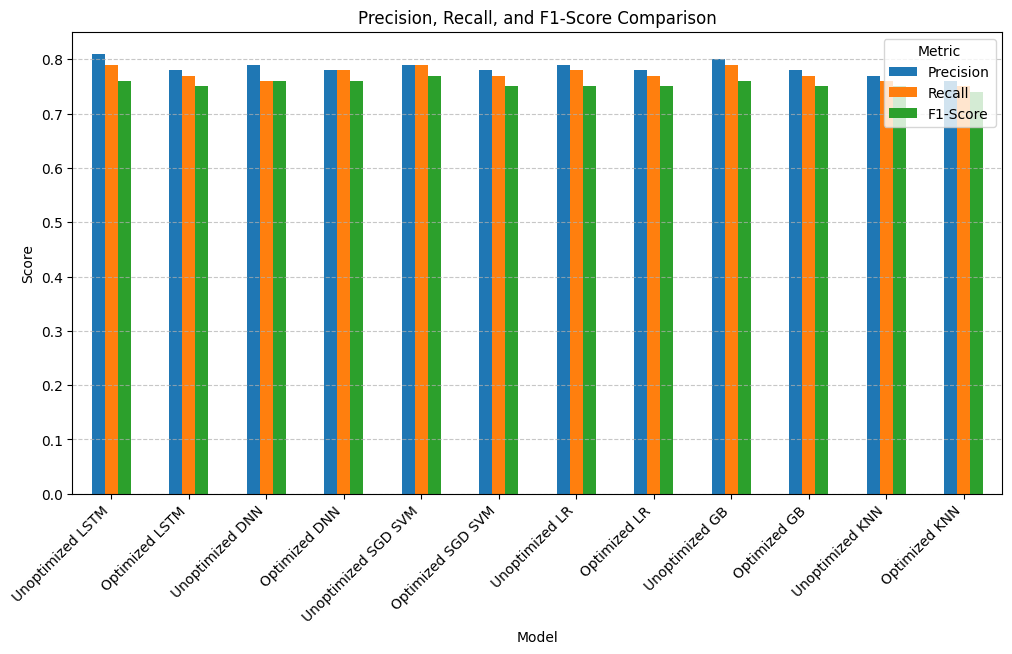

In [ ]:
# Precision, Recall, and F1-Score values for each model
precision_recall_f1 = {
    "Unoptimized LSTM": (0.81, 0.79, 0.76),
    "Optimized LSTM": (0.78, 0.77, 0.75),
    "Unoptimized DNN": (0.79, 0.76, 0.76),
    "Optimized DNN": (0.78, 0.78, 0.76),
    "Unoptimized SGD SVM": (0.79, 0.79, 0.77),
    "Optimized SGD SVM": (0.78, 0.77, 0.75),
    "Unoptimized LR": (0.79, 0.78, 0.75),
    "Optimized LR": (0.78, 0.77, 0.75),
    "Unoptimized GB": (0.80, 0.79, 0.76),
    "Optimized GB": (0.78, 0.77, 0.75),
    "Unoptimized KNN": (0.77, 0.76, 0.75),
    "Optimized KNN": (0.76, 0.75, 0.74),
}

# Convert to DataFrame for plotting
df_metrics = pd.DataFrame.from_dict(precision_recall_f1, orient='index', columns=['Precision', 'Recall', 'F1-Score'])

# Plot grouped bar chart
df_metrics.plot(kind='bar', figsize=(12, 6))
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score Comparison")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()